# Unit 4 - Practical visualisation

## New idioms
### preliminaries - load iris 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as data
import numpy as np
%matplotlib inline
iris = data.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
irisdf = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
irisdf['target'] = iris['target']
target_dict = dict(zip(range(3),iris['target_names']))
irisdf['species'] = [target_dict[int(t)] for t in iris['target']]
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [3]:
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### make figure of specific size, decorate with axis labels of specific font

Text(0, 0.5, 'sepal length (cm)')

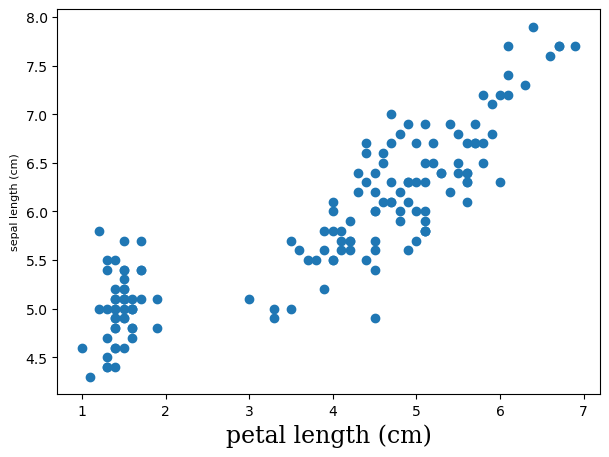

In [4]:
f = plt.figure(figsize=(7,5)) # makes a figure 7 inches wide, 5 inches high
ax = f.gca() # instead of plt.gca()
xvar = 'petal length (cm)'
yvar = 'sepal length (cm)'
ax.scatter(irisdf[xvar], irisdf[yvar])
ax.set_xlabel(xvar, size=17, family='serif')
ax.set_ylabel(yvar, size=8, family='sans serif')

#### Task 1
* Set both axis labels to 10 pt sans-serif font.
* change figure size to 5 inches wide, 3 inches tall. 

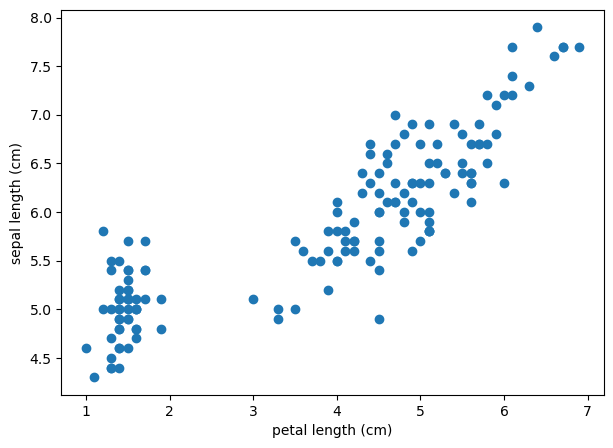

In [5]:


# Make figure of specific size, decorate with axis labels of specific font
f = plt.figure(figsize=(7, 5))  # Makes a figure 7 inches wide, 5 inches high
ax = f.gca()  # Instead of plt.gca()
xvar = 'petal length (cm)'
yvar = 'sepal length (cm)'
ax.scatter(irisdf[xvar], irisdf[yvar])

# Task 1: Set both axis labels to 10 pt sans-serif font
ax.set_xlabel(xvar, size=10, family='sans-serif')
ax.set_ylabel(yvar, size=10, family='sans-serif')

plt.show()


### Colormaps

We have previously seen colormaps for matrices:

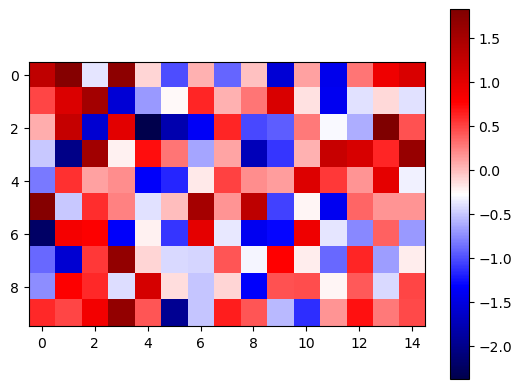

In [6]:
mat = np.random.randn(10,15)
f = plt.figure()
ax = f.gca()
img = ax.imshow(mat, cmap='seismic') # diverging colormaps, since randn varries around mean zero
plt.colorbar(img)

#### Centering a colormap

Note that matplotlib by default chooses limits for the colormap from the minimum and the maximum of the data. This is not always desired. For example, in the above example, we know that the data is centered on zero. Zero should therefore be at the center of the colorbar.

We can achieve this by explicitly passing the vmin and vmax parameters to the function:

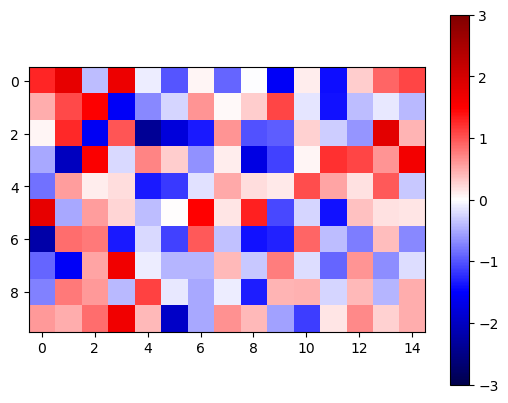

In [7]:
f = plt.figure()
ax = f.gca()
# center on zero by passing identical lower and upper bounds. 
img = ax.imshow(mat, cmap='seismic', vmin=-3., vmax=3.) 
plt.colorbar(img)

#### Colormaps and scatter plots
Colormaps can also be applied to scatter plots. 

The example below uses a sequential colormap to indicate the value of the 'sepal width (cm)' feature.

Note that adding a colorbar requires storing the return value of the `scatter(...)` command.

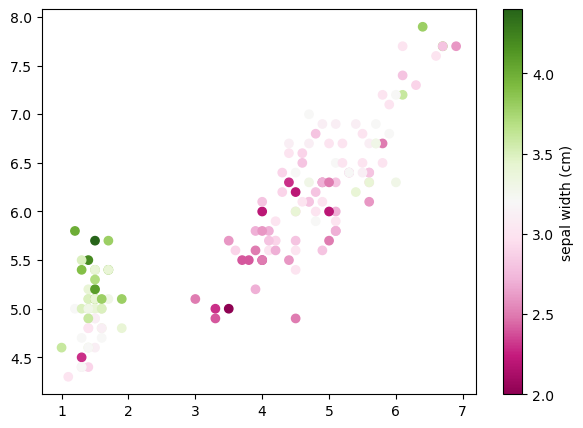

In [8]:
f = plt.figure(figsize=(7,5))
ax = f.gca() # instead of plt.gca()
dots = ax.scatter(irisdf['petal length (cm)'], irisdf['sepal length (cm)'],
           c=irisdf['sepal width (cm)'],    # the 'c' parameter specifies the feature to use for coloring
           cmap='PiYG')                     # the cmap parameter specifies the colormap
# adding colorbar
plt.colorbar(dots, label='sepal width (cm)')

Similarly, we can use a diverging colormap, e.g. to indicate the target value. 

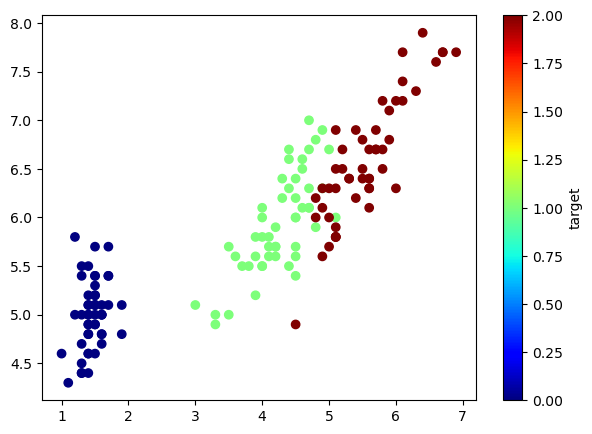

In [9]:
f = plt.figure(figsize=(7,5))
ax = f.gca() # instead of plt.gca()
dots = ax.scatter(irisdf['petal length (cm)'], irisdf['sepal length (cm)'],
           c=irisdf['target'],    # the 'c' parameter specifies the feature to use for coloring
           cmap='jet')                     # the cmap parameter specifies the colormap
# adding colorbar
plt.colorbar(dots, label='target')

Obviously, the colorbar makes little sense here. The example was mainly added for the sake of completeness. 

Instead, we should to use a legend. The matplotlib `legend` command is quite smart and can infer all required information from a plot. However, we need to make three tweaks:
1. add "label" information to the plotted dots.
2. use the `plot` command instead of `scatter`, since the latter doesn't support the "label" parameter.
3. add the different species separately since only one label can be specified per plot command.

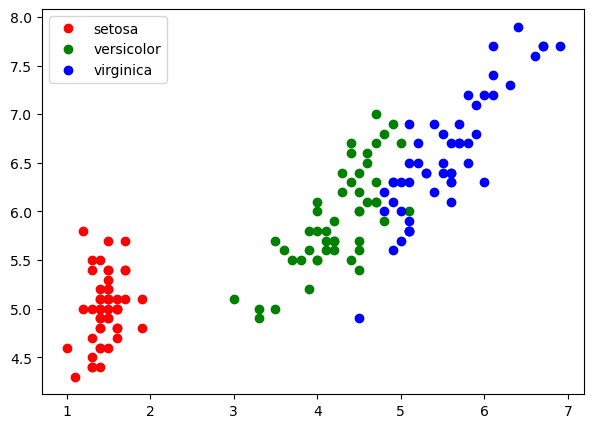

In [10]:
f = plt.figure(figsize=(7,5))
ax = f.gca() # instead of plt.gca()
for lab,c in zip(iris['target_names'], ['red', 'green', 'blue']): #loop over species
    ax.plot(irisdf['petal length (cm)'][irisdf['species']==lab], 
            irisdf['sepal length (cm)'][irisdf['species']==lab],
            color=c,    # specifies the color
            marker='o', # specifies the marker
            linestyle='', # orevents drawing a line
            label=lab) # adds label information to the dots
ax.legend()

## Brain networks

The "Brain Networks" dataset contains the activity of 62 brain regions of 920 time points. Neuroscientists are interested in the correlation between the activities in different brain areas. This tells them which brain areas are potentially connected. Such insight allows conclusions about how the brain works, which is at the heart of neuroscience.

Here, we will analyse the correlation between those time series. The dataset is available on Canvas ("brain_networks.csv").

First we load the data set.

This dataset has three header rows (0, 1 and 2) and one index column.

The highest level is the brain network, the middle level the brain node, and the lowest level is the hemishpese (left or right hemisphere). We use the `df.head` function to display the top 15 rows of the dataset.

In [11]:
import pandas as pd

# Load the brain networks example dataset
df = pd.read_csv('brain_networks.csv', header=[0, 1, 2], index_col=0)
df.head(15)


network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
5       -24.906792 -51.191895 -29.867994 -27.840294 -24.455107  47.115761   
6        17.273710   0.540083  18.649370  -9.105489  -2.117226  87.957710   
7        20.712934  10.650232   9.156902 -15.880466   1.948806  51.916603   
8        48.215309  46.369450  30.311281  21.030554 -14.135849  13.317879   
9         2.632546  33.998898   8.142659  42.572460   0.644133   9.879410   
10       25.925964 -15.774749  54.659813  80.348549  27.536982  47.937374   
11      -56.421814 -74.313713 -22.430784  22.268995  29.032286  73.269424   
12      -20.486719 -18.707275  -8.405787  10.911598   6.834342  33.627548   
13      -29.466019 -38.972973 -44.623367 -15.115207 -12.154548  -7.261045   
14       -4.389784 -47.513359  37.163383  -2.465017   1.309325 -23.852072   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   
5       -48.462822 -35.409416 -15.900566  18.471722  ...  71.707077   
6       -16.892422 -30.359053  31.080502 -23.428696  ...  21.220881   
7       -23.105467 -10.486548  46.230053   1.649448  ...   1.960933   
8        24.965271  22.771103  16.624685  38.645073  ... -62.801281   
9        29.575994  30.350441   4.341114  28.691851  ...  22.890541   
10       42.101318  49.025600  -5.077273 -28.578943  ...   2.036250   
11       24.101446  41.093948 -38.175583  -5.696390  ...  29.318686   
12        8.794911   6.194620 -16.169006 -16.451103  ... -34.897839   
13       -8.790039 -14.007578   6.017861   0.070593  ...  54.615002   
14       -3.335904  -2.885546  20.038055  -8.326096  ...  26.069582   

network                                 17                                    \
node              4                      1                     2               
hemi             lh          rh         lh         rh         lh          rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784   68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450   31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110  -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144   12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882  -11.719750   
5        108.209824  -38.985954  56.435616  11.073356  22.712286  -24.315147   
6        112.865852  -11.026081  43.089622  18.862913  58.889000  -48.427845   
7        128.105240  -20.091087  70.872963   5.356585   2.463416  -71.227463   
8         28.770023   16.215826  -2.414807 -25.556829 -27.571753   -8.465719   
9        -39.991383   43.338600 -14.897267  39.848324  16.728914   73.404282   
10       -52.860115   47.748283 -18.635521  43.819660   5.793301  101.111610   
11        11.448578   81.840347   7.765820  29.006664  -0.320702   16.183874   
12        26.061226   58.972008 -11.258547  18.986279  22.827385   20.753315   
13        50.747589   67.938797   6.480777  47.148136 

Let's calculate the correlation between brain networks. Correlation is similar to covariance, except that it also takes the series' standard deviation into account.

Remember the equation for covariance:

\begin{equation*}
cov(\mathbf{x},\mathbf{y}) = \frac{\sum_i \left(x_i-\langle x\rangle \right) \left(y_i-\langle y\rangle \right)}{n} 
\end{equation*}

with $\langle x \rangle$ denoting the mean of $x$.

Correlation is the covariance divided by the product of the two standard deviations:

\begin{equation*}
corr(\mathbf{x},\mathbf{y}) = \frac{\sum_i \left(x_i-\langle x\rangle \right) \left(y_i-\langle y\rangle \right)}
{n \cdot \sigma_x \cdot \sigma_y} 
\end{equation*}

Note that in case of unit variance, like after normalisation of the variables using `sklearn.StandardScaler`, both standard deviations will be one and therefore correlation will be equal to covariance. 

We can compute the correlation matrix of a dataframe using the following:

In [12]:
corrmat = df.corr()
corrmat

network                   1                   2                   3            \
node                      1                   1                   1             
hemi                     lh        rh        lh        rh        lh        rh   
network node hemi                                                               
1       1    lh    1.000000  0.881516 -0.042699 -0.074437 -0.342849 -0.169498   
             rh    0.881516  1.000000  0.013073  0.033733 -0.351509 -0.162006   
2       1    lh   -0.042699  0.013073  1.000000  0.813394 -0.006940 -0.039375   
             rh   -0.074437  0.033733  0.813394  1.000000 -0.027324 -0.023608   
3       1    lh   -0.342849 -0.351509 -0.006940 -0.027324  1.000000  0.553183   
...                     ...       ...       ...       ...       ...       ...   
17      2    lh   -0.206379 -0.273370 -0.151724 -0.224447  0.026579 -0.056687   
             rh   -0.212601 -0.266456 -0.124508 -0.172704 -0.089109 -0.144020   
        3    lh   -0.142770 -0.174222 -0.179912 -0.250455 -0.012675 -0.047434   
             rh   -0.204326 -0.223572 -0.044706 -0.090798 -0.024644 -0.103875   
        4    lh   -0.219283 -0.273626 -0.209557 -0.216674  0.013747 -0.058838   

network                   4                   5            ...        16  \
node                      1                   1            ...         3   
hemi                     lh        rh        lh        rh  ...        rh   
network node hemi                                          ...             
1       1    lh   -0.373050 -0.361726  0.431619  0.418708  ... -0.106642   
             rh   -0.333244 -0.337476  0.431953  0.519916  ... -0.173530   
2       1    lh   -0.019773  0.007099 -0.147374 -0.104164  ... -0.215429   
             rh   -0.017577 -0.014632 -0.173501 -0.094717  ... -0.184458   
3       1    lh    0.528787  0.503403 -0.157154 -0.185008  ... -0.146451   
...                     ...       ...       ...       ...  ...       ...   
17      2    lh    0.020064  0.084837 -0.359879 -0.394522  ...  0.173117   
             rh    0.007278  0.029909 -0.299152 -0.295150  ...  0.299440   
        3    lh    0.070114  0.100063 -0.245179 -0.303354  ... -0.055529   
             rh    0.101791  0.128318 -0.302654 -0.277378  ...  0.079460   
        4    lh   -0.069100 -0.031653 -0.282767 -0.279381  ...  0.418857   

network                                      17                                \
node                      4                   1                   2             
hemi                     lh        rh        lh        rh        lh        rh   
network node hemi                                                               
1       1    lh   -0.162254 -0.232501 -0.099781 -0.161649 -0.206379 -0.212601   
             rh   -0.224436 -0.277954 -0.212964 -0.262915 -0.273370 -0.266456   
2       1    lh   -0.239876 -0.093679 -0.240455 -0.190721 -0.151724 -0.124508   
             rh   -0.244956 -0.061151 -0.255101 -0.169402 -0.224447 -0.172704   
3       1    lh   -0.033931 -0.156972 -0.015964 -0.149944  0.026579 -0.089109   
...                     ...       ...       ...       ...       ...       ...   
17      2    lh    0.478606  0.258958  0.499351  0.319184  1.000000  0.597620   
             rh    0.204444  0.453497  0.272868  0.440901  0.597620  1.000000   
        3    lh    0.259191  0.046663  0.454838  0.188905  0.601382  0.345253   
             rh    0.005291  0.296318  0.087061  0.224760  0.319382  0.456019   
        4    lh    0.603491  0.172167  0.589364  0.451264  0.517481  0.256544   

network                                          
node                      3                   4  
hemi                     lh        rh        lh  
network node hemi                                
1       1    lh   -0.142770 -0.204326 -0.219283  
             rh   -0.174222 -0.223572 -0.273626  
2       1    lh   -0.179912 -0.044706 -0.209557  
             rh   -0.250455 -0.090798 -0.216674  
3       1    lh   -0.012675

The correlation matrix is a square matrix and the values range from -1 to 1.

A correlation of 1 means that two series are fully correlated, that is, series $\mathbf{x}$ is the same as $\mathbf{y}$, except for potential scaling and translation (i.e., multiplication and/or addition of a constant).

A correlation of -1 means that two series are exactly the "opposite" of each other. They are "anticorrelated".

Both correlation of -1 and 1 mean that the two series are fully predictable.

A correlation of 0 means that the two values are uncorrelated., that is, series $\mathbf{x}$ is not linearly  predictable from series $\mathbf{y}$.

#### Correlation matrix
Now, let's plot the correlation matrix. It's a square matrix with possible values between -1 and 1.

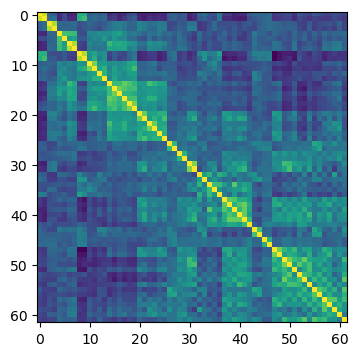

In [13]:
f = plt.figure(figsize=(4,6))
ax = f.gca()
ax.imshow(corrmat.values)

### Task 2
1. Add a colorbar to the figure.
2. make the figure 7 inch large and square.
2. go to the [matplotlib colormap tutorial](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html), have a look at the available colormaps and choose a diverging colormap of your liking.
3. use the documentation of the `imshow` command to find out how to change the colormap. Hint: use `plt.imshow?` to display the documentation for `imshow`.
4. Scale the colormap such that the minimum value it reports is -1 and the maximum is 1. The mean will be zero. Hint: Look at the `vmin` and `vmax` parameters in the documentation.
5. Save the figure in PNG format with 150 dpi. 
6. Verify that the saved figure has the dimensions 7x7 inch. Hint: Open Word, create a new document, insert the figure, right click -> "Size and Position", check "Original Size". You may have to convert centimeters to inches.

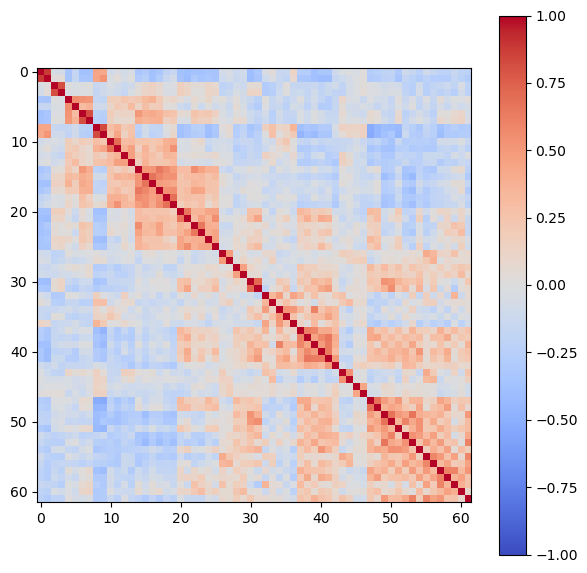

In [14]:
#Task2

import matplotlib.pyplot as plt


#Task2.2 To Make the figure 7 inches large and square
f = plt.figure(figsize=(7, 7))  
ax = f.gca()

#Task2.3 Choose a diverging colormap (e.g., 'coolwarm')
colormap = plt.get_cmap('coolwarm')

#Task2.4 Displaying the plot for correlation matrix using imshow
img = ax.imshow(corrmat.values, cmap=colormap, vmin=-1, vmax=1)

#Task2.1 and 2.5 Now, we are adding a colorbar to this figure.
#Note: plt.colorbar(img) adds a colorbar to the figure, using the image (img) created by the imshow function. 
cbar = plt.colorbar(img)

#Task2.6 Save the figure in PNG format with 150 dpi
f.savefig('correlation_matrix.png', format='png', dpi=150)

plt.show()


<span style="color:blue">
    
**#Task 2.7**

*Yes, we can see the "Original Size" in "Size" dialog box*

*The dimensions are in centimeters, so we need to convert them to inches by following - (inches=centimeters/2.54)*

**From = 17.78 centimeter is converted To = 7 inch**

**Conclusion:**  *We can clearly see that both width and height are 7 inches* 
*So, the figure has been successfully saved with the specified dimensions*


</span>

## Coronavirus campaign continued — Explorative analysis


1. Download the newest version of th coronavirus dataset from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset .

2. Plot the ...
 * number of cases in Hubei over time
 * number of deaths in Hubei over time
 * infection rate over time (new cases per existing cases)
 * mortality rate in Hubei over time (deaths per cases)
 * recovery rate in Hubei over time (recoveries per cases)
 
3. Plot a bar chart that shows the number of cases in Mainland China vs. all other countries listed. Sort bars in decreasing order. Hint: Look at `matplotlib.pyplot.hist` for how to make a bar histogram.

In [15]:
#coronavirus dataset

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Raveena\OneDrive\ADS Practicals\novel-corona-virus-2019-dataset\2019_nCoV_data.csv')
df.head(10)

#first we need to check column names and types from given coronavirus dataset file 2019_nCoV_data.csv
#print(df.info())

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


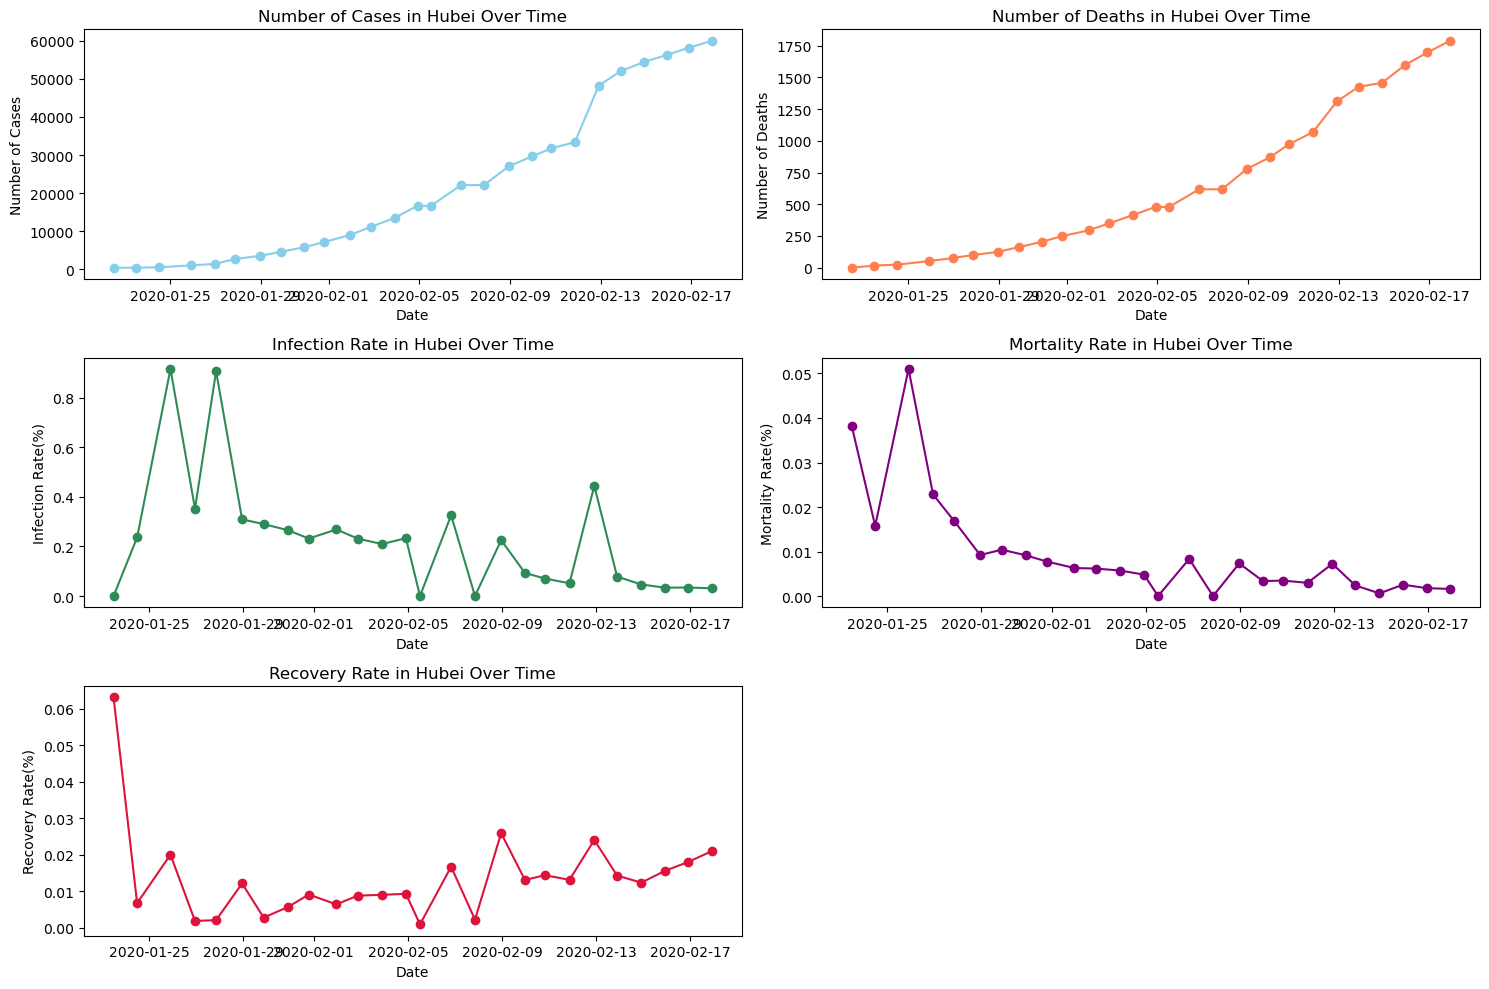

In [16]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Raveena\OneDrive\ADS Practicals\novel-corona-virus-2019-dataset\2019_nCoV_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
hubei_data = df[df['Province/State'] == 'Hubei']

#Intially, we need to assume 'Date' is column containing date information
date_column = 'Date'

#Filtering the data for Hubei.
hubei_data = df[df['Province/State'] == 'Hubei'].copy()  # We can make a copy to avoid SettingWithCopyWarning

#Evaluating daily new cases
hubei_data.loc[:, 'DailyNewCases'] = hubei_data['Confirmed'].diff()

#Evaluating daily new deaths
hubei_data.loc[:, 'DailyNewDeaths'] = hubei_data['Deaths'].diff()

#Evaluating infection rate (new cases per existing cases)
hubei_data.loc[:, 'InfectionRate'] = hubei_data['DailyNewCases'] / hubei_data['Confirmed'].shift()

#Evaluating mortality rate (deaths per cases)
hubei_data.loc[:, 'MortalityRate'] = hubei_data['DailyNewDeaths'] / hubei_data['Confirmed'].shift()

#Evaluating daily new recoveries
hubei_data.loc[:, 'DailyNewRecoveries'] = hubei_data['Recovered'].diff()

#Evaluating recovery rate (recoveries per cases)
hubei_data.loc[:, 'RecoveryRate'] = hubei_data['DailyNewRecoveries'] / hubei_data['Confirmed'].shift()

#Displaying the plots all metrics together
plt.figure(figsize=(15, 10))

#Task a Displaying the plot for Number of cases over time
plt.subplot(3, 2, 1)
plt.plot(hubei_data[date_column], hubei_data['Confirmed'], marker='o', color='skyblue')
plt.title('Number of Cases in Hubei Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

#Task b Displaying the plot for Number of deaths over time
plt.subplot(3, 2, 2)
plt.plot(hubei_data[date_column], hubei_data['Deaths'], marker='o', color='Coral')
plt.title('Number of Deaths in Hubei Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')

#Task c Displaying the plot for Infection rate over time
plt.subplot(3, 2, 3)
plt.plot(hubei_data[date_column], hubei_data['InfectionRate'], marker='o', color='seagreen')
plt.title('Infection Rate in Hubei Over Time')
plt.xlabel('Date')
plt.ylabel('Infection Rate(%)')

#Task d Displaying the plot for Mortality rate over time
plt.subplot(3, 2, 4)
plt.plot(hubei_data[date_column], hubei_data['MortalityRate'], marker='o', color='purple')
plt.title('Mortality Rate in Hubei Over Time')
plt.xlabel('Date')
plt.ylabel('Mortality Rate(%)')

# Task e Displaying the plot for Recovery rate over time
plt.subplot(3, 2, 5)
plt.plot(hubei_data[date_column], hubei_data['RecoveryRate'], marker='o', color='crimson')
plt.title('Recovery Rate in Hubei Over Time')
plt.xlabel('Date')
plt.ylabel('Recovery Rate(%)')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


Below we have two tasks to practice your data wrangling skills.

## Advanced data campaign 1 - data cleaning



### Task 3

1. Standardise the column 'Country' (i.e. 'China' vs. 'Mainland China')
2. Standardise the format of the date strings in 'Date' and 'Last Update'. Consult the documentation for `pandas.to_datetime`.

In [17]:
#Task 3
data = {
    'Country': ['China', 'Mainland China', 'US', 'Italy'],
    'Date': ['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25'],
    'Last Update': ['2020-01-22 12:00:00', '2020-01-23 14:30:00', '2020-01-24 18:00:00', '2020-01-25 21:45:00']
}
df = pd.DataFrame(data)

#Task3.1 here we are Standardizing the 'Country' column
df['Country'] = df['Country'].replace({'Mainland China': 'China'})

#Task3.2 here we are Standardizing the format of date strings in 'Date' and 'Last Update'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Last Update'] = pd.to_datetime(df['Last Update'], format='%Y-%m-%d %H:%M:%S')

# Display the modified DataFrame
print(df)

  Country       Date         Last Update
0   China 2020-01-22 2020-01-22 12:00:00
1   China 2020-01-23 2020-01-23 14:30:00
2      US 2020-01-24 2020-01-24 18:00:00
3   Italy 2020-01-25 2020-01-25 21:45:00


## Advanced data campaign 2 - explorative

This task is optional.

Caution, this is probably the hardest problem in the entire module. It's **completely optional**, but if the previous tasks were easy for you, I encourage you to try your hand at it. Feel free to discuss your approach during the practical!

* plot the number of cases in Hubei and number of recoveries
* Can you estimate the recovery lag, i.e. how long is the average duration between recording of a case and recovery?
* Can you apply the estimated lag to the calculation of the mortality rate (i.e. calculate mortality rate with appropriate lag)?

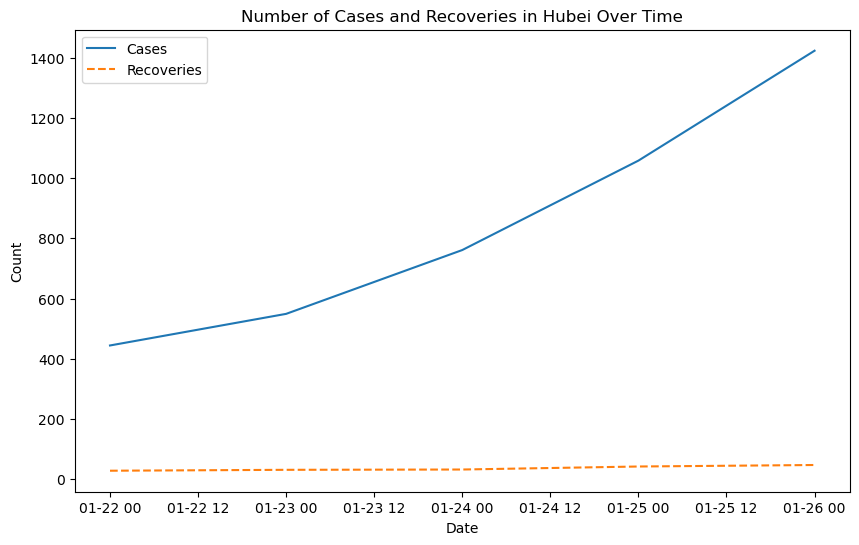

  Country Province/State       Date  Confirmed  Recovered  Recovery Lag  \
0   China          Hubei 2020-01-22        444         28          -1.0   
1   China          Hubei 2020-01-23        549         31          -1.0   
2   China          Hubei 2020-01-24        761         32          -1.0   
3   China          Hubei 2020-01-25       1058         42          -1.0   
4   China          Hubei 2020-01-26       1423         47           NaN   

   Mortality Rate  
0             NaN  
1        0.951473  
2        0.960859  
3        0.970642  
4        0.971331  


In [18]:
#Final Task 
data = {
    'Country': ['China', 'China', 'China', 'China', 'China'],
    'Province/State': ['Hubei', 'Hubei', 'Hubei', 'Hubei', 'Hubei'],
    'Date': ['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26'],
    'Confirmed': [444, 549, 761, 1058, 1423],
    'Recovered': [28, 31, 32, 42, 47]
}

df = pd.DataFrame(data)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Displaying the plot for number of cases and recoveries in Hubei
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], label='Cases')
plt.plot(df['Date'], df['Recovered'], label='Recoveries', linestyle='dashed')
plt.title('Number of Cases and Recoveries in Hubei Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#Task a: Here, we are estimating the recovery lag (average duration between recording of a case and recovery)
df['Recovery Lag'] = (df['Date'] - df['Date'].shift(-1)).dt.days
average_recovery_lag = df['Recovery Lag'].mean()

#Task b: Here, we are evaluating the mortality rate with appropriate lag
df['Mortality Rate'] = df['Confirmed'] / (df['Recovered'].shift(-int(average_recovery_lag)) + df['Confirmed'])

#Now, we need to display the modified DataFrame with estimated recovery lag and mortality rate
print(df)
